# Functions

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

FIGS_DIR = Path("./tex/figs/").resolve()

plt.style.use("../custom.matplotlibrc")

P = 32
powers_of_two = [pow(2, i + 1) for i in range(P)]
indices = np.array(list(range(1, 33)))


def generate_histogram(ax, number_of_sequences, number_of_coin_flips, 
                       propability_for_tails = lambda index: 0.5):
    """
    
    First Generate an S x P sized array with numbers from a uniform distribution between 0 and 1.
    Then check if that number is heads (1) or tails (0) based on the specificed probability of tails.
    Generate a normalized histogram of the observables of all sequences.
    
    :param ax: Axes for saving the histogram
    :param int number_of_sequences: number of observables to generate.
    :param int number_of_coin_flips: number of coin_flips per sequence.
    :param probalility_for_tails: probability of tails (0). This has to be a function 
        of the index j of the coin-flip inside the sequence.
        
    """
    
    uniformly_generated_numbers = np.random.uniform(low=0, high=1, 
                                size=(number_of_sequences, number_of_coin_flips))
    probability_for_indices = propability_for_tails(indices) 
    coin_flips = np.apply_along_axis(lambda arr: arr >= probability_for_indices, 1, uniformly_generated_numbers)
    numbers = (coin_flips / powers_of_two).sum(axis=1)

    ax.hist(numbers, bins=15, density=True)


## Exercise 1 Uniform Distribution

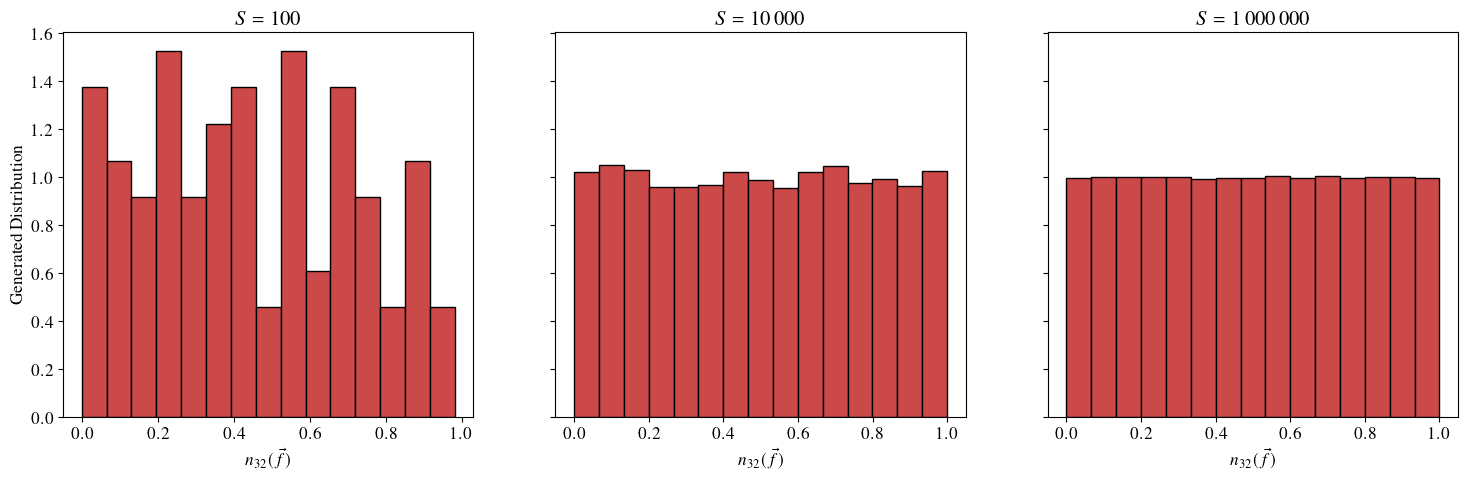

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
ax[0].set_ylabel(r"Generated Distribution")

for i, s in enumerate([pow(10, exponent) for exponent in [2, 4, 6]]):

    ax[i].set_title(f"$S = \\num{{{s}}}$")
    ax[i].set_xlabel(f"$n_{{{P}}}(\\vec f)$")
    generate_histogram(ax[i], s, P)
    
fig.savefig(FIGS_DIR / r"fair_coin_flips_hist.pdf")

## Exercise 2 Different Distributions

$$P_j(\mathrm{tails}) = \frac{1}{1+e^{-\lambda / 2^{j+1}}}$$

Error found? it should be $2^j$ and not $2^{j+1}$

/tmp/ipykernel_79673/575980318.py:9: RuntimeWarning: invalid value encountered in divide
  return x / x


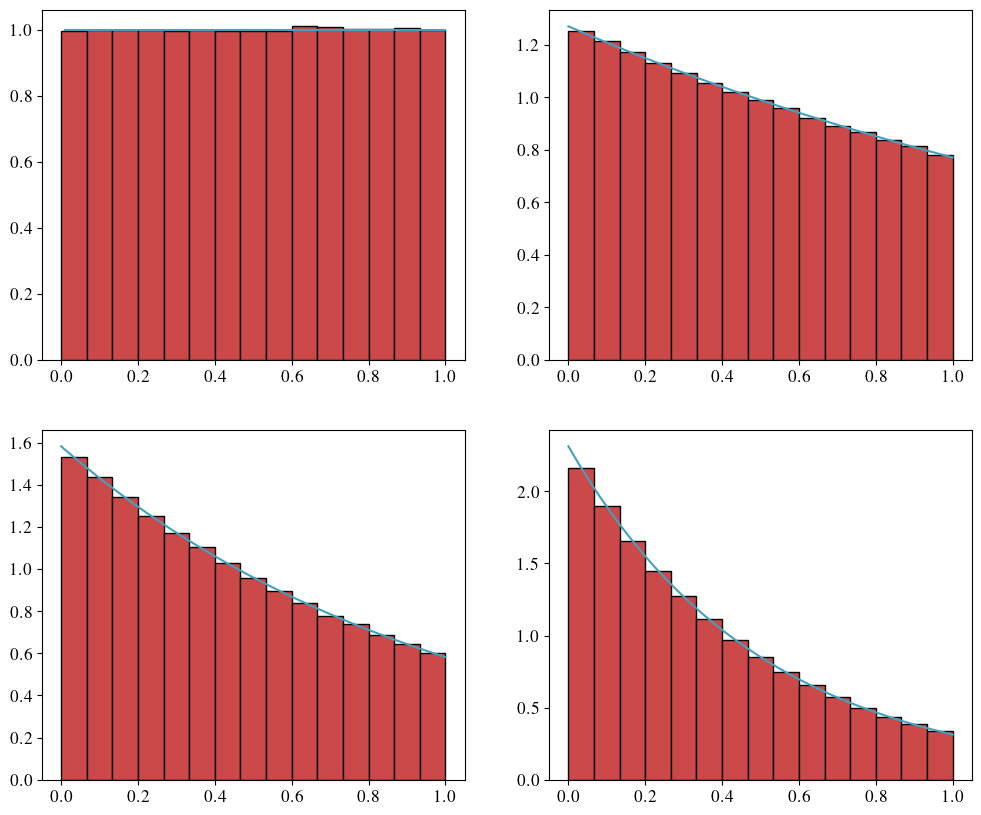

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))


def distribution_of_coin_flip(l, j):
    return 1 / (1 + np.exp(-l / (pow(2, j))))

def distribution_of_observable(l, x):
    if l == 0:
        return x / x
    return l / (1 - np.exp(-l)) * np.exp(-l * x)


def get_ax_index(index):
    if index == 0:
        return 0, 0
    elif index == 1:
        return 0, 1
    elif index == 2:
        return 1, 0
    else:
        return 1, 1

for i, l in enumerate([0, 0.5, 1, 2]):
    generate_histogram(ax[get_ax_index(i)], pow(10, 6), 32, lambda j: distribution_of_coin_flip(l, j))

    x = np.linspace(0, 1, 100)
    ax[get_ax_index(i)].plot(x, distribution_of_observable(l, x))
